## AI기반 챗봇 및 OCR 개발 전문가 과정

### 교과목명 : 판다스, 넘파이, 통계
- 평가일 : 24. 6. 14
- 성명 : 김성현
- 점수 :

Q1. df1에서 각 열의 데이터 타입을 아래와 같이 변환한 후 변환된 타입을 확인하세요.
- 'A' 열을 정수형(int)으로 변환
- 'B' 열을 부동 소수점(float)으로 변환
- 'C' 열을 datetime 형식으로 변환

In [5]:
import pandas as pd

df1 = pd.DataFrame({
    'A': ['1', '2', '3', '4'],
    'B': ['5.1', '6.2', '7.3', '8.4'],
    'C': ['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01']
})
df1['A'] = df1['A'].astype(int)
df1['B'] = df1['B'].astype(float)
df1['C'] = pd.to_datetime(df1['C'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   A       4 non-null      int64         
 1   B       4 non-null      float64       
 2   C       4 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 224.0 bytes


Q2. 주어진 DataFrame의 N열에서 Series s값을 빼고 결과를 새로운 열 O에 저장 후 출력하세요.

In [7]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    "M": [15, 25, 35, 45, 55],
    "N": [100, 200, 300, 400, 500]
})
print(df,'\n')
# Series 생성
s = pd.Series([5, 10, 15, 20, 25])
df['O'] = df['N'] - s
df

    M    N
0  15  100
1  25  200
2  35  300
3  45  400
4  55  500 



,M,N,O
0,15,100,95
1,25,200,190
2,35,300,285
3,45,400,380
4,55,500,475


Q3. 주어진 DataFrame의 여러 열에 대해 각기 다른 Series를 더하고, 결과를 새로운 DataFrame으로 반환한 후 각 행의 합계를 계산하여 새로운 열에 추가하여 출력하세요.

In [71]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    "A": [1, 2, 3, 4, 5],
    "B": [10, 20, 30, 40, 50],
    "C": [100, 200, 300, 400, 500]
})

# Series 생성
s1 = pd.Series([5, 5, 5, 5, 5])
s2 = pd.Series([10, 10, 10, 10, 10])
s3 = pd.Series([15, 15, 15, 15, 15])

new_A = df["A"] + s1
new_B = df["B"] + s2
new_C = df["C"] + s3
df2 = pd.DataFrame({
    'new_A': new_A,
    'new_B': new_B,
    'new_C': new_C
})

df2['sum'] = df2.sum(axis=1)
df2

,new_A,new_B,new_C,sum
0,6,20,115,141
1,7,30,215,252
2,8,40,315,363
3,9,50,415,474
4,10,60,515,585


Q4. 주어진 DataFrame에서 'Category'별로 그룹화하여 각 그룹의 'Value' 열의 평균을 계산하세요.

In [15]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    "Category": ["A", "B", "A", "B", "C", "A", "C", "B", "A", "C"],
    "Value": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
})
df.head()
mean = df.groupby('Category')['Value'].mean()
mean

Category
A    47.500000
B    46.666667
C    73.333333
Name: Value, dtype: float64

Q5. 주어진 DataFrame에서 'Category'별로 그룹화하여 각 그룹의 'Value' 열의 합계, 평균, 최대값, 최소값을 계산하세요.

In [72]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    "Category": ["A", "B", "A", "B", "C", "A", "C", "B", "A", "C"],
    "Value": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
})
res = df.groupby('Category')['Value'].agg(['sum', 'mean', 'max', 'min'])
res

,sum,mean,max,min
Category,,,,
A,190,47.500000,90,10
B,140,46.666667,80,20
C,220,73.333333,100,50


Q6. 주어진 Series의 각 값에 대해 2배로 변환하는 함수를 적용하여 값을 변환하세요.

In [19]:
import pandas as pd

# Series 생성
s = pd.Series([1, 2, 3, 4, 5])

def twice(x):
    return x * 2

s.apply(lambda x:twice(x))

0     2
1     4
2     6
3     8
4    10
dtype: int64

Q7. 주어진 DataFrame의 각 요소에 대해 10보다 크면 2배, 그렇지 않으면 원래의 수를 반영하는 함수를 적용하여 값을 변환하세요.

In [24]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    "Values": [5, 10, 15, 20, 25]})

def trans(x):
    if x > 10:
        return x * 2
    else:
        return x

df['Values'].map(lambda x: trans(x))

0     5
1    10
2    30
3    40
4    50
Name: Values, dtype: int64

Q8. 고객 정보 데이터프레임과 구매 내역 데이터프레임을 결합하여 각 고객이름(name) 별 총 지출을 계산하여 출력하세요.

In [27]:
import pandas as pd

# 고객 정보 데이터프레임 생성
customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
})

# 구매 내역 데이터프레임 생성
purchases = pd.DataFrame({
    'purchase_id': [101, 102, 103, 104, 105],
    'customer_id': [1, 2, 1, 3, 2],
    'amount': [250, 150, 200, 300, 350]
})
print(customers,'\n')
print(purchases)

total_df = pd.merge(customers, purchases, on='customer_id')
print(total_df)
total_df.groupby('name')['amount'].sum()

   customer_id     name
0            1    Alice
1            2      Bob
2            3  Charlie
3            4    David 

   purchase_id  customer_id  amount
0          101            1     250
1          102            2     150
2          103            1     200
3          104            3     300
4          105            2     350
   customer_id     name  purchase_id  amount
0            1    Alice          101     250
1            1    Alice          103     200
2            2      Bob          102     150
3            2      Bob          105     350
4            3  Charlie          104     300


name
Alice      450
Bob        500
Charlie    300
Name: amount, dtype: int64

Q9. 고객 데이터프레임에서 age가 30 이상이고 spending이 500 이상인 고객을 찾아 출력하세요.

In [28]:
import pandas as pd

# 예제 데이터프레임 생성
customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'age': [25, 35, 30, 40, 28],
    'spending': [300, 600, 500, 700, 400]
})
customers[(customers['age']>= 30) | (customers['spending'] >= 500) ]

,customer_id,name,age,spending
1,2,Bob,35,600
2,3,Charlie,30,500
3,4,David,40,700


Q10. 주어진 df의 날짜 리스트를 datetime 형식으로 변환하고, 변환된 데이터프레임의 년도, 월, 일 열을 추가하시오.

In [31]:
import pandas as pd

# 날짜 문자열 리스트
date_list = ['2023-01-01', '2023-02-15', '2023-03-30']

# 데이터프레임 생성
df = pd.DataFrame(date_list, columns=['date'])
df
df['date'] = pd.to_datetime(df['date'])
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df

,date,year,month,day
0,2023-01-01,2023,1,1
1,2023-02-15,2023,2,15
2,2023-03-30,2023,3,30


Q11. 2023년 1월 1일부터 2023년 12월 31일까지의 날짜 범위를 생성하고, 이 날짜 범위에서 매월 첫 번째 날만 포함하는 데이터프레임을 작성하세요.

In [73]:
date = pd.date_range('2023-01-01', '2023-12-31', freq='MS')
df = pd.DataFrame({
    'date': date})
print(df)

         date
0  2023-01-01
1  2023-02-01
2  2023-03-01
3  2023-04-01
4  2023-05-01
5  2023-06-01
6  2023-07-01
7  2023-08-01
8  2023-09-01
9  2023-10-01
10 2023-11-01
11 2023-12-01


Q12.2020년부터 2025년까지의 분기별 기간 범위를 생성하고, 각 분기의 시작과 끝 날짜를 포함하는 데이터프레임을 작성하세요.

- pd.period_range 이용

In [75]:
date = pd.period_range('2020', '2025', freq="Q")
df = pd.DataFrame({

   'date': date})
df['start'] = date.start_time.date
df['end'] = date.end_time.date
df


,date,start,end
0,2020Q1,2020-01-01,2020-03-31
1,2020Q2,2020-04-01,2020-06-30
2,2020Q3,2020-07-01,2020-09-30
3,2020Q4,2020-10-01,2020-12-31
4,2021Q1,2021-01-01,2021-03-31
5,2021Q2,2021-04-01,2021-06-30
6,2021Q3,2021-07-01,2021-09-30
7,2021Q4,2021-10-01,2021-12-31
8,2022Q1,2022-01-01,2022-03-31
9,2022Q2,2022-04-01,2022-06-30


Q13. 주어진 df 에서 2022-01-02 이후의 데이터를 필터링하세요.

In [48]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    'date': ['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05'],
    'value': [1, 2, 3, 4, 5]
})

df

df['date'] = pd.to_datetime(df['date'])
df[df['date'] > '2022-01-02']

,date,value
2,2022-01-03,3
3,2022-01-04,4
4,2022-01-05,5


Q14. 주어진 데이터프레임에서 주말(토요일과 일요일) 데이터를 필터링하세요.(주말: 5,6)

In [51]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    'date': ['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-08', '2022-01-09'],
    'value': [1, 2, 3, 4, 5]
})
df['date'] = pd.to_datetime(df['date'])
df
df['weekofday'] = df['date'].dt.day_of_week
df
df[df['weekofday'] >= 5]

,date,value,weekofday
0,2022-01-01,1,5
1,2022-01-02,2,6
3,2022-01-08,4,5
4,2022-01-09,5,6


Q15. array2d에서 슬라이싱을 사용해서 아래와 같이 출력하세요.

array2d = np.arange(1,10).reshape(3,3)

```
[[1 2 3]
[4 5 6]
[7 8 9]]

[[2 3]
[5 6]]

[1 4]
```

In [68]:
import numpy as np

array2d = np.arange(1,10).reshape(3,3)
print(array2d[:][:])
print()
print(array2d[0:2,1:])
print()
print(array2d[:2,0])

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[[2 3]
 [5 6]]

[1 4]


Q16. 적절한 데이터를 생성하여 선그래프, 히스토그램, 산점도, 막대그래프 4개의 subplot으로 구성된 2 x 2 그래프를 작성하세요.

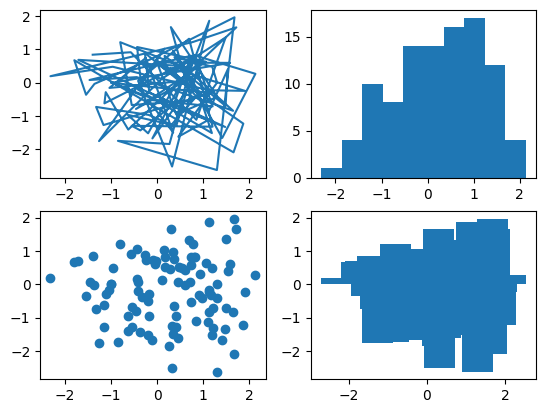

In [145]:
import matplotlib.pyplot as plt

a = np.random.normal(0, 1, 100)
b = np.random.normal(0, 1, 100)

plt.subplot(2,2,1)
plt.plot(a,b)
plt
plt.subplot(2,2,2)
plt.hist(a)
plt
plt.subplot(2,2,3)
plt.scatter(a,b)
plt
plt.subplot(2,2,4)
plt.bar(a,b)
plt.show()

Q17. 평균이 172.5, 표준편차가 6인 정규 분포를 따르는 아래 데이터를 생성한 후 과제를 수행하세요.

data = stats.norm.rvs(loc=172.5, scale=6, size=10000)

- 생성된 데이터를 사용하여 히스토그램 작성
- 히스토그램의 빈(bin) 수를 조정해서 작성
- 두개의 그래프를 1행 2열로 표현

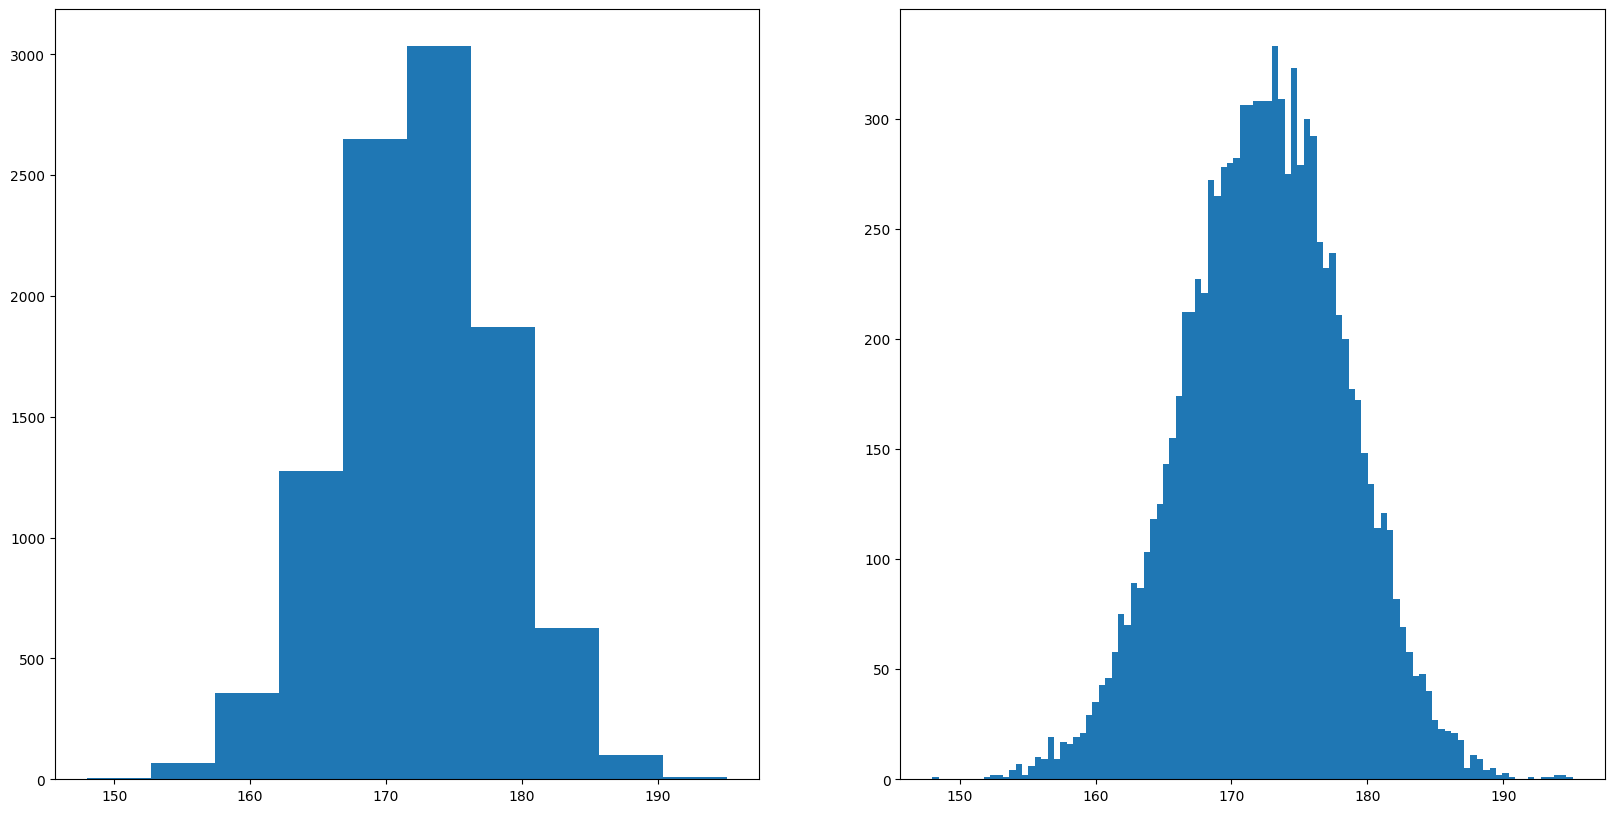

In [125]:
import matplotlib.pyplot as plt
import scipy.stats as stats

data = stats.norm.rvs(loc=172.5, scale=6, size=10000)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes[0].hist(data)
axes[1].hist(data, bins=100)
plt.show()

Q18. 주어진 숫자 배열(예: [4, 8, 15, 16, 23, 42])에 대해 평균과 중앙값을 계산한 후 배열에 두 개의 극단값을 추가한 후(예: -100, 100), 다시 평균과 중앙값을 계산하고 비교하세요.

In [112]:
arr = np.array([4, 8, 15, 16, 23, 42])
arr
print(arr.mean())
print(arr.std())
arr = np.append(arr, [-100, 100])
print(arr.mean())
print(arr.std())
#비교 양쪽에 큰 값이 들어가 서 평균은 큰 차이가 없으나 중앙값은 큰 차이로 벗어났다.

18.0
12.315302134607444
13.5
51.71556825560365


Q19. 주어진 데이터 배열의 사분위수(제1사분위수, 중앙값, 제3사분위수)를 계산한 후 데이터의 10번째 백분위수와 90번째 백분위수를 계산하여 출력하세요.
- data = np.arange(1000)

In [135]:
data = np.arange(1000)
dq1 = np.percentile(data, 25)
d_median = np.median(data)
dq3 = np.percentile(data, 75)
print(dq1)
print(d_median)
print(dq3)

print(np.percentile(data, 10))
print(np.percentile(data, 90))


249.75
499.5
749.25
99.9
899.1


Q20. auto-mpg 데이터셋을 전처리 및 탐색적 분석 수행 후 mpg을 예측하는 회귀모델을 생성하고 일반화 성능 평가를 수행하세요.

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Google Colab에서 파일 업로드
from google.colab import files
uploaded = files.upload()


Saving auto-mpg (1).csv to auto-mpg (1).csv


In [97]:
df = pd.read_csv('auto-mpg (1).csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [120]:
# 결측값 처리
df.info()
# horsepower가 오브젝트인 경우라 그 컬럼 확인해보겠다.
print(df['horsepower'].unique()) #? 표 존재 ?를 가진행 삭제
df = df[df['horsepower'] != '?']
df['horsepower'] = df['horsepower'].astype(float)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '11

<ipython-input-120-e5652e661354>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower'] = df['horsepower'].astype(float)


In [140]:
# 탐색적 데이터 분석
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [141]:
# 변수 선정 (상관계수 기반)
corr = df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']].corr()
print(corr) #상관계수가 높은것만 선택하여 가속도 제외

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   

              acceleration  
mpg               0.423329  
cylinders        -0.504683  
displacement     -0.543800  
horsepower       -0.689196  
weight           -0.416839  
acceleration      1.000000  


In [146]:
# 분석용 데이터셋 구축
analysis_df = df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight']]
target_variable = 'mpg'

In [147]:
# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(analysis_df.drop(columns=[target_variable]))

# 표준화된 데이터를 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_features, columns=analysis_df.columns.drop(target_variable))
scaled_df[target_variable] = analysis_df[target_variable].values

# 데이터셋 확인
print(scaled_df.head())

   cylinders  displacement  horsepower    weight   mpg
0   1.483947      1.077290    0.664133  0.620540  18.0
1   1.483947      1.488732    1.574594  0.843334  15.0
2   1.483947      1.182542    1.184397  0.540382  18.0
3   1.483947      1.048584    1.184397  0.536845  16.0
4   1.483947      1.029447    0.924265  0.555706  17.0


In [148]:
# 회귀 모델 구축
X = scaled_df.drop(columns=[target_variable])
y = scaled_df[target_variable]

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 17.89193621074136
Root Mean Squared Error: 4.229886075385643
R-squared: 0.6494566661462675
